In [1]:
import os
import torch
import matplotlib.pyplot as plt

from typing import List, Tuple, Dict, Any

In [2]:
MODELS_DIR = "models"
METRICS_DIR = "metrics"

In [3]:
all_models = os.listdir(MODELS_DIR)

In [4]:
all_completed_models = [model for model in all_models if model.startswith("completed")]

In [5]:
print(all_completed_models)
all_completed_models = [model.split("completed_")[-1] for model in all_completed_models]
print(all_completed_models)

['completed_random_bottom_1_iterations_B50.pth', 'completed_random_bottom_2_iterations_B50.pth', 'completed_random_bottom_3_iterations_B50.pth', 'completed_random_bottom_4_iterations_B50.pth', 'completed_random_bottom_5_iterations_B50.pth', 'completed_random_bottom_6_iterations_B50.pth', 'completed_random_top_1_iterations_B10.pth', 'completed_random_top_2_iterations_B10.pth', 'completed_random_top_3_iterations_B10.pth', 'completed_random_top_4_iterations_B10.pth', 'completed_random_top_5_iterations_B10.pth', 'completed_random_top_6_iterations_B10.pth', 'completed_typiclust_bottom_1_iterations_B50.pth', 'completed_typiclust_bottom_2_iterations_B50.pth', 'completed_typiclust_bottom_3_iterations_B50.pth', 'completed_typiclust_bottom_4_iterations_B50.pth', 'completed_typiclust_bottom_5_iterations_B50.pth', 'completed_typiclust_bottom_6_iterations_B50.pth', 'completed_typiclust_top_1_iterations_B10.pth', 'completed_typiclust_top_2_iterations_B10.pth', 'completed_typiclust_top_3_iterations_B

In [6]:
models_random = [model for model in all_completed_models if model.startswith("random")]
models_typiclust = [model for model in all_completed_models if model.startswith("typiclust")]

In [7]:
print(models_random)
print(models_typiclust)

['random_bottom_1_iterations_B50.pth', 'random_bottom_2_iterations_B50.pth', 'random_bottom_3_iterations_B50.pth', 'random_bottom_4_iterations_B50.pth', 'random_bottom_5_iterations_B50.pth', 'random_bottom_6_iterations_B50.pth', 'random_top_1_iterations_B10.pth', 'random_top_2_iterations_B10.pth', 'random_top_3_iterations_B10.pth', 'random_top_4_iterations_B10.pth', 'random_top_5_iterations_B10.pth', 'random_top_6_iterations_B10.pth']
['typiclust_bottom_1_iterations_B50.pth', 'typiclust_bottom_2_iterations_B50.pth', 'typiclust_bottom_3_iterations_B50.pth', 'typiclust_bottom_4_iterations_B50.pth', 'typiclust_bottom_5_iterations_B50.pth', 'typiclust_bottom_6_iterations_B50.pth', 'typiclust_top_1_iterations_B10.pth', 'typiclust_top_2_iterations_B10.pth', 'typiclust_top_3_iterations_B10.pth', 'typiclust_top_4_iterations_B10.pth', 'typiclust_top_5_iterations_B10.pth', 'typiclust_top_6_iterations_B10.pth']


In [8]:
all_random_models = {model: torch.load(f"{MODELS_DIR}/completed_{model}", weights_only=False) for model in models_random}
all_typiclust_models = {model: torch.load(f"{MODELS_DIR}/completed_{model}", weights_only=False) for model in models_typiclust}

In [9]:
print(all_random_models)

{'random_bottom_1_iterations_B50.pth': {'model': OrderedDict([('conv1.weight', tensor([[[[-2.0135e-02,  2.3273e-02,  1.0937e-01,  ...,  2.2603e-01,
            1.6577e-01,  1.7249e-01],
          [-6.1981e-02, -4.0086e-02, -1.0634e-01,  ..., -1.4667e-01,
            8.6373e-03,  1.7142e-01],
          [-3.8950e-02,  5.9530e-02,  3.1744e-01,  ...,  6.0412e-01,
            3.2452e-01,  1.8031e-01],
          ...,
          [-1.4762e-01,  2.3306e-02,  1.3217e-01,  ..., -3.1093e-01,
           -3.9314e-01, -1.6192e-01],
          [-1.2767e-01, -2.3590e-02,  6.2015e-02,  ...,  3.3404e-01,
            3.3209e-01,  2.3060e-01],
          [-2.8811e-02, -2.3483e-02, -1.3333e-02,  ..., -1.5745e-01,
           -8.3349e-02,  4.2840e-02]],

         [[ 3.9929e-03,  3.8197e-02,  1.2073e-01,  ...,  2.6775e-01,
            2.2201e-01,  2.4775e-01],
          [ 9.7480e-04,  3.5644e-02, -3.8938e-02,  ..., -9.9681e-02,
            6.5895e-02,  2.7713e-01],
          [-1.2300e-02,  1.4523e-01,  4.9266e-01

In [10]:
def extract_accuracies(models:Dict[str, Dict[str, Any]]):
    accuracies = []
    cumulative_samples = []

    for model in models:
        strings = model.split("_")
        num_iterations = int(strings[2])
        budget_size = int(strings[-1].split(".")[0].split("B")[-1]) # B10.pth -> 10

        metrics =  models[model]["metrics"]
        accuracy = metrics["total_accuracy"]

        n_cumulative_samples = num_iterations * budget_size

        cumulative_samples.append(n_cumulative_samples)
        accuracies.append(accuracy)
    return accuracies, cumulative_samples

In [11]:
tops = []
bottoms = []

for models in [all_random_models, all_typiclust_models]:
    bottom_models = {model: models[model] for model in models if "bottom" in model}
    top_models = {model: models[model] for model in models if "top" in model}

    accuracies, cumulative_samples = extract_accuracies(models=top_models)
    print("here", top_models.keys())
    
    # Extract model name for plotting
    keys = list(top_models.keys())
    if keys[0].startswith("typiclust"):
        model_name = "Typiclust"
    else:
        model_name = "Random"

    # Extract accuracies and cumulative samples for the "top" and "bottom" models
    accuracies, cumulative_samples = extract_accuracies(models=top_models)
    tops.append({"accuracies": accuracies, "cumulative_samples": cumulative_samples, "model_name": model_name})

    accuracies, cumulative_samples = extract_accuracies(models=bottom_models)
    bottoms.append({"accuracies": accuracies, "cumulative_samples": cumulative_samples, "model_name": model_name})


here dict_keys(['random_top_1_iterations_B10.pth', 'random_top_2_iterations_B10.pth', 'random_top_3_iterations_B10.pth', 'random_top_4_iterations_B10.pth', 'random_top_5_iterations_B10.pth', 'random_top_6_iterations_B10.pth'])
here dict_keys(['typiclust_top_1_iterations_B10.pth', 'typiclust_top_2_iterations_B10.pth', 'typiclust_top_3_iterations_B10.pth', 'typiclust_top_4_iterations_B10.pth', 'typiclust_top_5_iterations_B10.pth', 'typiclust_top_6_iterations_B10.pth'])


In [12]:
print(tops)
print(bottoms)

[{'accuracies': [0.0959, 0.153, 0.118, 0.1309, 0.1313, 0.1186], 'cumulative_samples': [10, 20, 30, 40, 50, 60], 'model_name': 'Random'}, {'accuracies': [0.1005, 0.1258, 0.1301, 0.1065, 0.1797, 0.1429], 'cumulative_samples': [10, 20, 30, 40, 50, 60], 'model_name': 'Typiclust'}]
[{'accuracies': [0.101, 0.1517, 0.202, 0.1246, 0.1524, 0.1918], 'cumulative_samples': [50, 100, 150, 200, 250, 300], 'model_name': 'Random'}, {'accuracies': [0.1557, 0.1866, 0.1738, 0.1259, 0.1983, 0.1502], 'cumulative_samples': [50, 100, 150, 200, 250, 300], 'model_name': 'Typiclust'}]


In [13]:
def plot_accuracy_on_samples(data):
    for i, entry in enumerate(data):
        plt.plot(entry["cumulative_samples"], entry["accuracies"], label=entry["model_name"])
    
    plt.xlabel("Cumulative samples")
    plt.ylabel("Accuracy")
    plt.title("Accuracy on cumulative samples")
    plt.legend()
    plt.show()

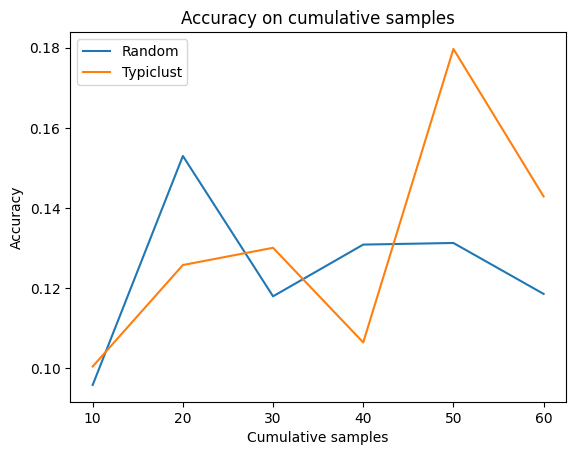

In [14]:
plot_accuracy_on_samples(tops)

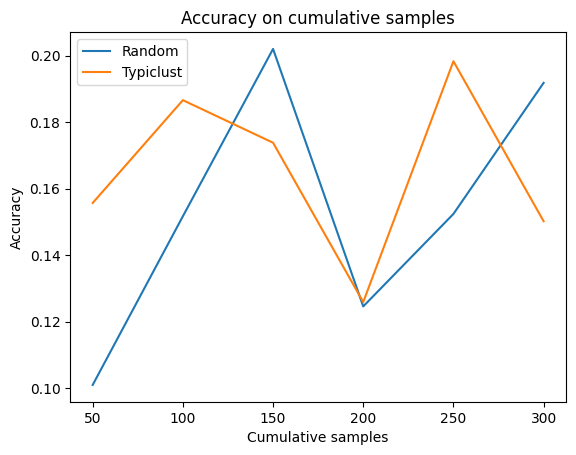

In [15]:
plot_accuracy_on_samples(bottoms)